In [ ]:
# Jalankan di mesin yang punya tensorflow terinstal (contoh: pip install tensorflow)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
df = pd.read_csv('spotify_churn_dataset.csv')

In [ ]:
#Ordinal Encoding
encoder = OrdinalEncoder()
df[["country", "subscription_type"]] = encoder.fit_transform(df[['country','subscription_type']])
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,1.0,1.0,26,23,0.20,Desktop,31,0,1
1,2,Other,33,2.0,0.0,141,62,0.34,Web,0,1,0
2,3,Male,38,0.0,2.0,199,38,0.04,Mobile,0,1,1
3,4,Female,22,1.0,3.0,36,2,0.31,Mobile,0,1,0
4,5,Other,29,7.0,0.0,250,57,0.36,Mobile,0,1,1


In [ ]:
# split 70/15/15
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size=0.17647058823529413,random_state=42,stratify=y_train_full)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

In [ ]:
#Cek Data null
df.isnull().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [ ]:
#Scaling data
scaler = MinMaxScaler(feature_range=(0,1))

#Numerical Columns
num_col_ = [col for col in df.columns
  if df[col].dtypes != 'O' and col != 'Id']
x1 = df[num_col_]

#Mempelajari prameter statistik untuk setiap data dan ditransformasikan
x1 = scaler.fit_transform(x1)
x1 = pd.DataFrame(x1, columns=num_col_)
x1.head()

,user_id,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
0,0.000000,0.883721,0.142857,0.333333,0.055363,0.224490,0.333333,0.632653,0.0,1.0
1,0.000125,0.395349,0.285714,0.000000,0.453287,0.622449,0.566667,0.000000,1.0,0.0
2,0.000250,0.511628,0.000000,0.666667,0.653979,0.377551,0.066667,0.000000,1.0,1.0
3,0.000375,0.139535,0.142857,1.000000,0.089965,0.010204,0.516667,0.000000,1.0,0.0
4,0.000500,0.302326,1.000000,0.000000,0.830450,0.571429,0.600000,0.000000,1.0,1.0


In [ ]:
#PEMBUATAN MODEL
model = Sequential([
    Input(shape=(2,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True)
history = model.fit(X_train_s, y_train, validation_data=(X_val_s,y_val),
                    epochs=200, batch_size=32, callbacks=[early], verbose=1)

test_loss, test_acc = model.evaluate(X_test_s, y_test)
print('Test accuracy:', test_acc)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5205 - loss: 0.6860 - val_accuracy: 0.7408 - val_loss: 0.5879
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 0.5871 - val_accuracy: 0.7408 - val_loss: 0.5723
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7370 - loss: 0.5790 - val_accuracy: 0.7408 - val_loss: 0.5709
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7412 - loss: 0.5724 - val_accuracy: 0.7408 - val_loss: 0.5702
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7400 - loss: 0.5743 - val_accuracy: 0.7408 - val_loss: 0.5701
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7353 - loss: 0.5775 - val_accuracy: 0.7408 - val_loss: 0.5700
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7431 - loss: 0.5695 - val_accuracy: 0.7408 - val_loss: 0.5702
Epoch 8/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7458 - loss: 0.5659 - val_accu

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


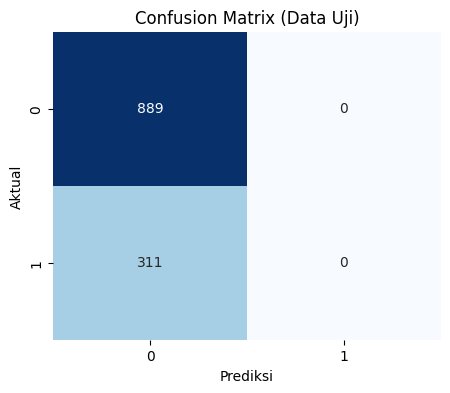

In [ ]:
#EVALUASI
# Pastikan model dan data uji sudah ada
# Prediksi probabilitas & konversi ke kelas (0 atau 1)
y_pred_prob = model.predict(X_test_s)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # threshold 0.5

# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Data Uji)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Tidak Churn (0)', 'Churn (1)']))

=== Classification Report ===
                 precision    recall  f1-score   support

Tidak Churn (0)       0.74      1.00      0.85       889
      Churn (1)       0.00      0.00      0.00       311

       accuracy                           0.74      1200
      macro avg       0.37      0.50      0.43      1200
   weighted avg       0.55      0.74      0.63      1200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
